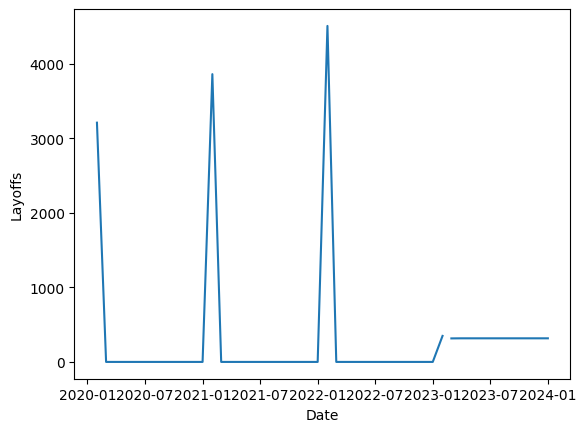

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Read in the CSV file containing layoff data
df = pd.read_csv("webdev6.csv")

# Convert the date column to a datetime object and set it as the index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Resample the data to monthly frequency
df_monthly = df.resample('M').sum()

# Train the ARIMA model on the historical data
model = ARIMA(df_monthly['laid_off'], order=(1, 1, 1))
model_fit = model.fit()

# Use the model to predict the layoff numbers for the next 5 years
future_index = pd.date_range(start=df_monthly.index[-1], periods=12, freq='M')
future_df = pd.DataFrame(index=future_index, columns=['Layoffs'])
future_df['laid_off'] = model_fit.forecast(steps=12)

# Combine the historical and forecast data into a single DataFrame
all_data = pd.concat([df_monthly, future_df])

# Plot the historical and forecast data on a graph
plt.plot(all_data.index, all_data['laid_off'])
plt.xlabel('Date')
plt.ylabel('Layoffs')
plt.show()
